## 데이터 준비

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import seaborn as sns
import re
import datetime
import os

In [ ]:
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
import glob
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/DATASET_CLEAN.csv")

In [ ]:
dataset.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425727 entries, 0 to 2425726
Data columns (total 79 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   DestinationPort          float64
 1   FlowDuration             float64
 2   TotalFwdPackets          float64
 3   TotalBackwardPackets     float64
 4   TotalLengthofFwdPackets  float64
 5   TotalLengthofBwdPackets  float64
 6   FwdPacketLengthMax       float64
 7   FwdPacketLengthMin       float64
 8   FwdPacketLengthMean      float64
 9   FwdPacketLengthStd       float64
 10  BwdPacketLengthMax       float64
 11  BwdPacketLengthMin       float64
 12  BwdPacketLengthMean      float64
 13  BwdPacketLengthStd       float64
 14  FlowBytes/s              float64
 15  FlowPackets/s            float64
 16  FlowIATMean              float64
 17  FlowIATStd               float64
 18  FlowIATMax               float64
 19  FlowIATMin               float64
 20  FwdIATTotal              float64
 21  FwdIATMe

In [ ]:
dataset

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425722,53.0,32215.0,4.0,2.0,112.0,152.0,28.0,28.0,28.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2425723,53.0,324.0,2.0,2.0,84.0,362.0,42.0,42.0,42.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2425724,58030.0,82.0,2.0,1.0,31.0,6.0,31.0,0.0,15.5,21.92031,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2425725,53.0,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,32.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [ ]:
main_features = ["FlowDuration", "FlowBytes/s", "FlowPackets/s", "FlowIATMean",
                 "FwdIATMean", "BwdIATMean", "ActiveMean", "IdleMean", "Label"]

In [ ]:
dataset = dataset[main_features]

In [ ]:
dataset.head()

,FlowDuration,FlowBytes/s,FlowPackets/s,FlowIATMean,FwdIATMean,BwdIATMean,ActiveMean,IdleMean,Label
0,3.0,4.000000e+06,666666.66670,3.0,3.0,0.0,0.0,0.0,BENIGN
1,109.0,1.100917e+05,18348.62385,109.0,0.0,0.0,0.0,0.0,BENIGN
2,52.0,2.307692e+05,38461.53846,52.0,0.0,0.0,0.0,0.0,BENIGN
3,34.0,3.529412e+05,58823.52941,34.0,0.0,0.0,0.0,0.0,BENIGN
4,3.0,4.000000e+06,666666.66670,3.0,3.0,0.0,0.0,0.0,BENIGN


In [ ]:
np.unique(dataset.Label)

array(['BENIGN', 'Bot', 'DDoS', 'DoS_GoldenEye', 'DoS_Hulk',
       'DoS_Slowhttptest', 'DoS_slowloris', 'FTPPatator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSHPatator', 'Web_Attack_Brute_Force',
       'Web_Attack_Sql_Injection', 'Web_Attack_XSS'], dtype=object)

In [ ]:
# Label을 T/F로 바꾸고 싶을때는?
# 다양한 방법이 있는 거 같은데 일단 아래처럼...

change_value_dict = {
    'BENIGN': True,
    'Bot': False,
    'DDoS': False,
    'DoS_GoldenEye': False,
    'DoS_Hulk': False,
    'DoS_Slowhttptest': False,
    'DoS_slowloris': False,
    'FTPPatator': False,
    'Heartbleed': False,
    'Infiltration': False,
    'PortScan': False,
    'SSHPatator': False,
    'Web_Attack_Brute_Force': False,
    'Web_Attack_Sql_Injection': False,
    'Web_Attack_XSS': False
}

dataset = dataset.replace({'Label' : change_value_dict})
np.unique(dataset.Label)

array([False,  True])

In [ ]:
np.unique(dataset.Label)

array([False,  True])

In [ ]:
dataset

,FlowDuration,FlowBytes/s,FlowPackets/s,FlowIATMean,FwdIATMean,BwdIATMean,ActiveMean,IdleMean,Label
0,3.0,4.000000e+06,666666.666700,3.0,3.00000,0.0,0.0,0.0,True
1,109.0,1.100917e+05,18348.623850,109.0,0.00000,0.0,0.0,0.0,True
2,52.0,2.307692e+05,38461.538460,52.0,0.00000,0.0,0.0,0.0,True
3,34.0,3.529412e+05,58823.529410,34.0,0.00000,0.0,0.0,0.0,True
4,3.0,4.000000e+06,666666.666700,3.0,3.00000,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...
2425722,32215.0,8.194940e+03,186.248642,6443.0,10277.33333,3.0,0.0,0.0,True
2425723,324.0,1.376543e+06,12345.679010,108.0,2.00000,2.0,0.0,0.0,True
2425724,82.0,4.512195e+05,36585.365850,41.0,4.00000,0.0,0.0,0.0,True
2425725,1048635.0,4.272221e+02,7.628965,149805.0,206722.60000,3.0,0.0,0.0,True


In [ ]:
labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [ ]:
features

,FlowDuration,FlowBytes/s,FlowPackets/s,FlowIATMean,FwdIATMean,BwdIATMean,ActiveMean,IdleMean
0,3.0,4.000000e+06,666666.666700,3.0,3.00000,0.0,0.0,0.0
1,109.0,1.100917e+05,18348.623850,109.0,0.00000,0.0,0.0,0.0
2,52.0,2.307692e+05,38461.538460,52.0,0.00000,0.0,0.0,0.0
3,34.0,3.529412e+05,58823.529410,34.0,0.00000,0.0,0.0,0.0
4,3.0,4.000000e+06,666666.666700,3.0,3.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2425722,32215.0,8.194940e+03,186.248642,6443.0,10277.33333,3.0,0.0,0.0
2425723,324.0,1.376543e+06,12345.679010,108.0,2.00000,2.0,0.0,0.0
2425724,82.0,4.512195e+05,36585.365850,41.0,4.00000,0.0,0.0,0.0
2425725,1048635.0,4.272221e+02,7.628965,149805.0,206722.60000,3.0,0.0,0.0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)

In [ ]:
features

array([[1.33333321e-07, 1.13636364e-01, 4.44444444e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01666657e-06, 1.11968307e-01, 3.36391437e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.41666617e-07, 1.12020055e-01, 3.39743590e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.91666594e-07, 1.12114588e-01, 3.39430894e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.73873253e-03, 1.11921281e-01, 3.33334605e-01, ...,
        2.50000000e-08, 0.00000000e+00, 0.00000000e+00],
       [7.91266594e-04, 1.11922968e-01, 3.33343866e-01, ...,
        4.00000000e-07, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# features[0]

array([1.33333321e-07, 1.13636364e-01, 4.44444444e-01, 1.33333319e-07,
       2.50000000e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:
# 1) 8:2(test)로 나눔
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1940581, 8), (485146, 8), (1940581,), (485146,))

In [ ]:
# 참값만 거르는 과정 (오토인코더만 학습시킬때만 해당) # RF 학습시킬 때는 이 셀 실행 X
normal_data = X_train[Y_train]
X_train, X_valid = train_test_split(normal_data, test_size=0.25, random_state=42)
X_train.shape, X_valid.shape

((1221126, 8), (407043, 8))

## Autoencoder

In [ ]:
input = Input(shape=(8,))

encoder1 = Dense(4, activation='relu')(input) 
encoder2 = Dense(2, activation='relu')(encoder1)

decoder1 = Dense(4, activation='relu')(encoder2)
decoder2 = Dense(8, activation='relu')(decoder1)

autoencoder = Model(inputs=input, outputs=decoder2)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ADAM = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer= ADAM , loss='mean_squared_error', metrics = ['accuracy'])

In [ ]:
dir_name = "MODEL_TEST" # 여기에 모델이랑 체크포인트 저장할 폴더 명시

In [ ]:
# 체크포인트 저장 경로 지정
checkpoint_path = os.path.join("/content/drive/MyDrive", dir_name + "/autoencoder", "cp.ckpt")
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  save_weights_only=True,
                                                  verbose=1)

In [ ]:
def run():
  with tf.device('/device:GPU:0'):
    history = autoencoder.fit(X_train, X_train, 
              epochs=20, batch_size=256, 
              validation_data=(X_valid, X_valid),
              callbacks=[cp_callback])
    return history

history = run()

Epoch 1/20
4770/4771 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.8780
Epoch 1: saving model to /content/drive/MyDrive/MODEL_TEST/autoencoder/cp.ckpt
4771/4771 [==============================] - 18s 3ms/step - loss: 0.0138 - accuracy: 0.8780 - val_loss: 0.0135 - val_accuracy: 0.8791
Epoch 2/20
4768/4771 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.8785
Epoch 2: saving model to /content/drive/MyDrive/MODEL_TEST/autoencoder/cp.ckpt
4771/4771 [==============================] - 14s 3ms/step - loss: 0.0130 - accuracy: 0.8785 - val_loss: 0.0129 - val_accuracy: 0.8787
Epoch 3/20
4751/4771 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.8785
Epoch 3: saving model to /content/drive/MyDrive/MODEL_TEST/autoencoder/cp.ckpt
4771/4771 [==============================] - 14s 3ms/step - loss: 0.0129 - accuracy: 0.8784 - val_loss: 0.0129 - val_accuracy: 0.8785
Epoch 4/20
4764/4771 [============================>.] - ETA: 0s - l

In [ ]:
model_path = os.path.join("/content/drive/MyDrive", dir_name, "autoencoder.h5")
autoencoder.save(model_path)

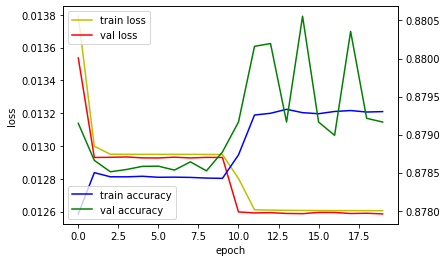

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()


In [ ]:
reconstruction = autoencoder.predict(X_train)
#train_loss = tf.keras.losses.mae(reconstruction, X_train)

In [ ]:
train_loss = np.mean(np.power(X_train - reconstruction, 2), axis = 1)

In [ ]:
#threshold = np.mean(train_loss) + np.std(train_loss) # train 데이터(참 값만 있음) 학습 시켰을 때의 reconstruction error 평균, 표준편차의 합으로 임계치 정함 # 최적 임계치 찾는 과정 필요할 듯

In [ ]:
threshold = 0.018

테스트 데이터셋에 적용해보는 과정

In [ ]:
predicted = autoencoder.predict(X_test)

In [ ]:
predicted

array([[0.        , 0.        , 0.33751214, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33536163, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37399736, ..., 0.        , 0.        ,
        0.05601525],
       ...,
       [0.        , 0.        , 0.33304814, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3693047 , ..., 0.        , 0.        ,
        0.0949879 ],
       [0.        , 0.        , 0.2600736 , ..., 0.        , 0.        ,
        1.0045276 ]], dtype=float32)

In [ ]:
mse = np.mean(np.power(X_test - predicted, 2), axis = 1)

In [ ]:
#loss = tf.keras.losses.mae(predicted, X_test)

In [ ]:
# threshold 보다 작으면 True, 크면 False 인 배열이 나옴 -> 실제 라벨과 비교하여 성능 측정하게 됨
predicted_label = tf.math.less(mse, threshold)

In [ ]:
predicted_label

<tf.Tensor: shape=(485146,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True, False])>

In [ ]:
accuracy = accuracy_score(Y_test, predicted_label)
precision = precision_score(Y_test, predicted_label)
recall = recall_score(Y_test, predicted_label)
f1 = f1_score(Y_test, predicted_label)
accuracy, precision, recall, f1

(0.8069096725521802, 0.891296049102409, 0.8769836204018304, 0.8840819124622123)

# CICIDS 2018, 모델 불러와서 테스트


In [ ]:
test_dataset = pd.read_csv("/content/drive/MyDrive/CICIDS2018/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv") # 요일마다 다른 공격?이 있는 거 같긴 한데 일단 제일 작은 dataset 고름

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
test_dataset

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909,0,999909,999909,61000000,0,61000000,61000000,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331120,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
331121,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
331122,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
331123,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


### 데이터셋 전처리

In [ ]:
np.unique(test_dataset['Label'])

array(['Benign', 'Infilteration', 'Label'], dtype=object)

In [ ]:
test_dataset.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
# 주요 특징 정보
# 주의 : 라벨도 포함 
main_features = ["Flow Duration", "Flow Byts/s", "Flow Pkts/s", "Flow IAT Mean",
                 "Fwd IAT Mean", "Bwd IAT Mean", "Active Mean", "Idle Mean", "Label"]

In [ ]:
test_dataset = test_dataset[main_features]

In [ ]:
change_value_dict = {
    'Benign': True,
    'Infilteration': False,
    'Label' : True
}

# 'Label'값이 'Label'인 건 없애도 될 것 같긴 한데 일단 true로..

test_dataset = test_dataset.replace({'Label' : change_value_dict})
np.unique(test_dataset['Label'])

array([False,  True])

자잘한 전처리들 진행하고 정규화

In [ ]:
# pd.to_numeric은 문자를 숫자로 변환함
# 이 때, 만약 숫자로 변경할 수 없는 데이터라면 기존 데이터를 지우고 NaN으로 설정하여 반환함
# NaN으로 바뀐 것은 dropna로 제거 가능

# 다만 실 데이터셋에는 특징 8개 거를 때 timestamp도 포함시켜야 하는데, timestamp는 숫자로 변환할 수 없기 때문에 주의 필요
# (timestamp 분리했다가 적용하고 다시 붙이는 식으로) 

# CICIDS 2018 데이터셋에는 컬럼 값에 문자열이 들어가 있는 경우가 있어서 아래 과정을 했는데, 만약 실 데이터셋 전처리 과정에서 필요없으면 생략 가능

test_dataset = test_dataset.apply(pd.to_numeric, errors='coerce')

In [ ]:
test_dataset = test_dataset.dropna(axis=0)

In [ ]:
test_dataset = test_dataset.replace([np.inf, -np.inf], np.nan)
test_dataset.dropna(inplace=True)

In [ ]:
test_dataset

,Flow Duration,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Fwd IAT Mean,Bwd IAT Mean,Active Mean,Idle Mean,Label
0,115307855.0,0.000000,0.043362,2.880000e+07,2.880000e+07,0.0000,1812348.0,56700000.0,True
1,60997457.0,0.000000,0.032788,6.100000e+07,6.100000e+07,0.0000,0.0,61000000.0,True
2,61149019.0,24.530238,0.081767,1.530000e+07,1.530000e+07,0.0000,3530939.0,19200000.0,True
3,60997555.0,0.000000,0.032788,6.100000e+07,6.100000e+07,0.0000,0.0,61000000.0,True
4,61997503.0,0.000000,0.048389,3.100000e+07,3.100000e+07,0.0000,999909.0,61000000.0,True
...,...,...,...,...,...,...,...,...,...
331107,118494070.0,0.000000,0.261616,3.949802e+06,3.949802e+06,0.0000,0.0,0.0,True
331108,114340.0,0.000000,26.237537,5.717000e+04,1.143400e+05,0.0000,0.0,0.0,True
331109,1404866.0,1931.145034,10.677175,1.003476e+05,2.006951e+05,223512.3333,0.0,0.0,True
331110,3966663.0,448.235708,5.294123,1.983331e+05,3.051279e+05,645623.0000,0.0,0.0,True


In [ ]:
Y = test_dataset['Label']
X = test_dataset.loc[:, test_dataset.columns != 'Label'].astype('float64')

In [ ]:
X

,Flow Duration,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Fwd IAT Mean,Bwd IAT Mean,Active Mean,Idle Mean
0,115307855.0,0.000000,0.043362,2.880000e+07,2.880000e+07,0.0000,1812348.0,56700000.0
1,60997457.0,0.000000,0.032788,6.100000e+07,6.100000e+07,0.0000,0.0,61000000.0
2,61149019.0,24.530238,0.081767,1.530000e+07,1.530000e+07,0.0000,3530939.0,19200000.0
3,60997555.0,0.000000,0.032788,6.100000e+07,6.100000e+07,0.0000,0.0,61000000.0
4,61997503.0,0.000000,0.048389,3.100000e+07,3.100000e+07,0.0000,999909.0,61000000.0
...,...,...,...,...,...,...,...,...
331107,118494070.0,0.000000,0.261616,3.949802e+06,3.949802e+06,0.0000,0.0,0.0
331108,114340.0,0.000000,26.237537,5.717000e+04,1.143400e+05,0.0000,0.0,0.0
331109,1404866.0,1931.145034,10.677175,1.003476e+05,2.006951e+05,223512.3333,0.0,0.0
331110,3966663.0,448.235708,5.294123,1.983331e+05,3.051279e+05,645623.0000,0.0,0.0


In [ ]:
X = X.values
Y = Y.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler_test = MinMaxScaler()
scaler_test.fit(X)
X = scaler_test.transform(X)

In [ ]:
X

array([[9.60898855e-01, 0.00000000e+00, 8.87289438e-09, ...,
        0.00000000e+00, 1.58977895e-02, 4.72500000e-01],
       [5.08312171e-01, 0.00000000e+00, 5.34825170e-09, ...,
        0.00000000e+00, 0.00000000e+00, 5.08333333e-01],
       [5.09575188e-01, 3.46472291e-08, 2.16746548e-08, ...,
        0.00000000e+00, 3.09731491e-02, 1.60000000e-01],
       ...,
       [1.17072092e-02, 2.72760598e-06, 3.55347715e-06, ...,
        1.86260278e-03, 0.00000000e+00, 0.00000000e+00],
       [3.30555191e-02, 6.33101283e-07, 1.75912636e-06, ...,
        5.38019167e-03, 0.00000000e+00, 0.00000000e+00],
       [7.21980929e-01, 0.00000000e+00, 2.11371335e-09, ...,
        0.00000000e+00, 0.00000000e+00, 7.21666667e-01]])

In [ ]:
sorted_feature = sorted(np.unique(X[:,0]))
sorted_feature[0], sorted_feature[-1] # 정규화 잘 됨 0~1

(0.0, 1.0)

## ONLY Autoencoder

In [ ]:
from keras.models import load_model

model_path = '/content/drive/MyDrive/MODEL_TEST/autoencoder.h5' # 모델 저장되어 있는 경로 작성
autoencoder = load_model(model_path)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_predicted = autoencoder.predict(X)

In [ ]:
test_predicted

array([[0.        , 0.        , 0.32913464, ..., 0.        , 0.        ,
        0.4303255 ],
       [0.        , 0.        , 0.3305405 , ..., 0.        , 0.        ,
        0.41970882],
       [0.        , 0.        , 0.36523953, ..., 0.        , 0.        ,
        0.12923226],
       ...,
       [0.        , 0.        , 0.15208235, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.15222588, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3085353 , ..., 0.        , 0.        ,
        0.60381174]], dtype=float32)

In [ ]:
#loss = tf.keras.losses.mae(test_predicted, X)
loss = np.mean(np.power(X - test_predicted, 2), axis = 1)
# threshold는 일단 모델 학습시킬 때 loss 로 계산한 값으로 넣음 threshold = np.mean(train_loss) + np.std(train_loss) 이거
# 수정 필요할 듯 
autoencoder_threshold = 0.018

predicted_label = tf.math.less(loss, autoencoder_threshold) 
predicted_label

<tf.Tensor: shape=(328181,), dtype=bool, numpy=array([False, False, False, ...,  True,  True, False])>

In [ ]:
loss

array([0.13438141, 0.0527924 , 0.04989994, ..., 0.0030068 , 0.00313691,
       0.09094464])

In [ ]:
accuracy = accuracy_score(Y, predicted_label)
precision = precision_score(Y, predicted_label)
recall = recall_score(Y, predicted_label)
f1 = f1_score(Y, predicted_label)
accuracy, precision, recall, f1

(0.6271112587261298,
 0.7079926489198974,
 0.8186005479730933,
 0.7592896019008991)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve

print(classification_report(predicted_label, Y))

              precision    recall  f1-score   support

       False       0.14      0.23      0.17     55568
        True       0.82      0.71      0.76    272613

    accuracy                           0.63    328181
   macro avg       0.48      0.47      0.47    328181
weighted avg       0.70      0.63      0.66    328181

